# SC/BEP Data Insights

In [1]:
import pathlib
import pandas as pd
import geopandas as gpd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore")

## Load datasets

In [3]:
country = gpd.read_file(pathlib.Path("country.geojson").open().read())

In [4]:
travel = pd.read_pickle('travel.pickle')

In [5]:
travel.columns

Index(['travel_id', 'mission_id', 'debut', 'fin', 'pays_origine',
       'ville_origine', 'pays', 'ville', 'lieu', 'mode_deplacement',
       'acronyme', 'libelle', 'faculte', 'elapsed', 'from_country',
       'dest_country', 'from_city', 'dest_city', 'from_ISO2', 'from_citycoded',
       'from_lat', 'from_lng', 'from_accuracy', 'from_confidence', 'dest_ISO2',
       'dest_citycoded', 'dest_lat', 'dest_lng', 'dest_accuracy',
       'dest_confidence', 'from_point', 'dest_point', 'distance'],
      dtype='object')

In [6]:
nM = len(travel['mission_id'].unique())
nT = travel.shape[0]
(nM, nT)

(6130, 6677)

In [7]:
travel.sample(5)

,travel_id,mission_id,debut,fin,pays_origine,ville_origine,pays,ville,lieu,mode_deplacement,...,from_confidence,dest_ISO2,dest_citycoded,dest_lat,dest_lng,dest_accuracy,dest_confidence,from_point,dest_point,distance
3027,3027,2734,2017-02-06,2017-02-12,NaN,NaN,Russie,St Pertersbourg,Université d'Etat de St PetersbourgUniversité ...,NaN,...,4.0,None,None,NaN,NaN,NaN,NaN,"(50.8436709, 4.3674366933879565)","(nan, nan)",NaN
419,419,378,2011-09-06,2011-09-23,NaN,NaN,Espagne,Osuna et Madrid,Universidad de Sevilla etBiblioteca Nacional,NaN,...,4.0,ES,Madrid,40.416705,-3.703582,0.858070,1.0,"(50.8436709, 4.3674366933879565)","(40.4167047, -3.7035825)",1316.913134
3843,3843,3479,2017-11-15,2017-11-18,NaN,NaN,France,Vienne,Université de Lyon,NaN,...,4.0,AT,Wien,48.208354,16.372504,0.769412,1.0,"(50.8436709, 4.3674366933879565)","(48.2083537, 16.3725042)",915.989356
402,402,364,2011-07-08,2011-07-09,NaN,NaN,France,Paris,Institut des sciences de la communication du CNRS,NaN,...,4.0,FR,Paris,48.856697,2.351462,0.931710,2.0,"(50.8436709, 4.3674366933879565)","(48.8566969, 2.3514616)",264.293514
2118,2118,1919,2015-12-03,2015-12-04,NaN,NaN,Allemagne,Cologne,"Global South Studies Center, Université de Col...",NaN,...,4.0,DE,None,50.938361,6.959974,0.700632,1.0,"(50.8436709, 4.3674366933879565)","(50.938361, 6.959974)",182.710537


In [8]:
mission = travel.groupby("mission_id").agg({
    "from_ISO2": "first", "dest_ISO2": 'first', 'travel_id': 'count', 
    'acronyme': 'first', 'faculte': 'first', 'elapsed': 'first', 'distance': 'sum'
}).reset_index()
mission.sample(5)

,mission_id,from_ISO2,dest_ISO2,travel_id,acronyme,faculte,elapsed,distance
75,75,BE,FR,1,SIC,LTC,2,762.841650
2960,2960,BE,FR,1,ScPOL,PHILOSCSOC,0,264.293514
1000,1000,BE,BE,2,HAA,PHILOSCSOC,0,88.490789
4726,4726,BE,FR,1,DECS,SBS,2,94.879968
5991,5991,BE,NL,1,L&L,LTC,14,137.603798


### Origin Geocoding accuracy

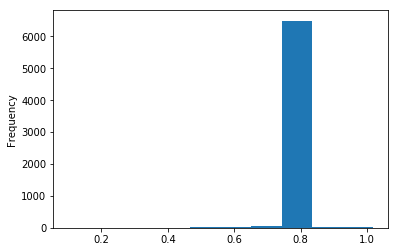

In [9]:
travel['from_accuracy'].plot(kind='hist')

### Destination Geocoding accuracy

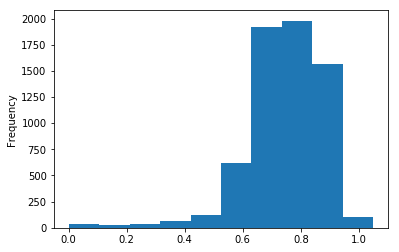

In [10]:
travel['dest_accuracy'].plot(kind='hist')

### Destination Geocoding efficiency

In [11]:
(~travel['dest_accuracy'].isnull()).sum()/travel.shape[0]

0.9695971244570915

### Basic Statistics

#### Mission count by acronym

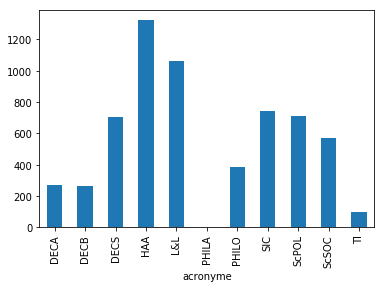

In [12]:
mission.groupby("acronyme")["mission_id"].count().plot(kind='bar')

#### Mission count by faculty

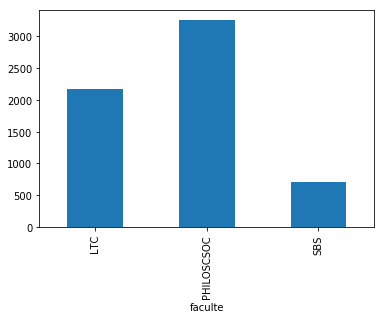

In [13]:
mission.groupby("faculte")["mission_id"].count().plot(kind='bar')

#### Mission cumulated duration by acronym

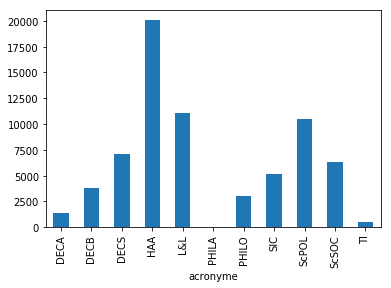

In [14]:
mission.groupby("acronyme")["elapsed"].sum().plot(kind='bar')

#### Mission cumulated duration by faculty

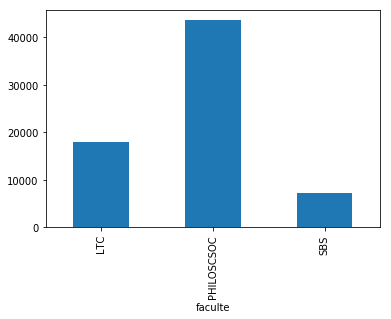

In [15]:
mission.groupby("faculte")["elapsed"].sum().plot(kind='bar')

#### Mission mean duration by acronym

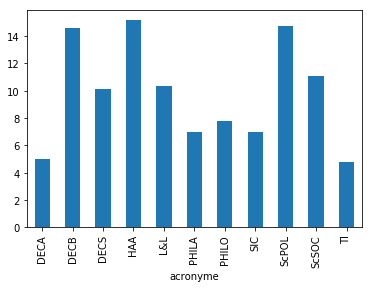

In [16]:
mission.groupby("acronyme")["elapsed"].mean().plot(kind='bar')

#### Mission median duration by acronym

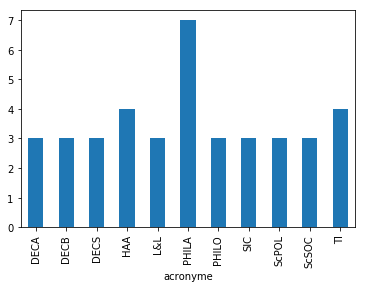

In [17]:
mission.groupby("acronyme")["elapsed"].median().plot(kind='bar')

#### Mission duration distribution

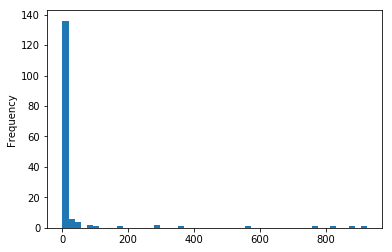

In [18]:
axe = mission.groupby("elapsed")["mission_id"].count().plot(kind='hist', bins=50)

#### Mission distance distribution

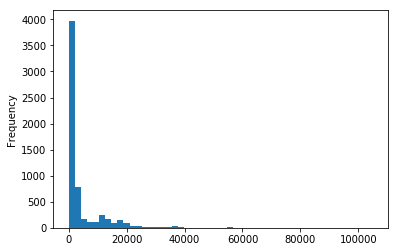

In [19]:
axe = (2*mission["distance"]).plot(kind='hist', bins=50)

#### Mission mean distance by acronym

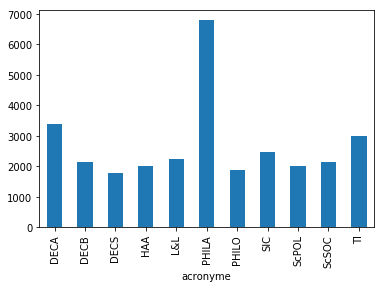

In [20]:
mission.groupby("acronyme")["distance"].mean().plot(kind='bar')

#### Mission median distance by acronym

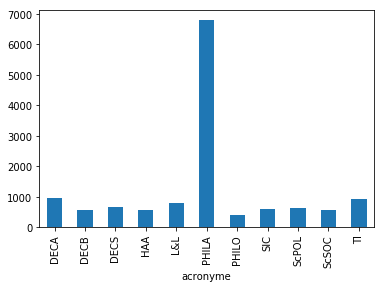

In [21]:
mission.groupby("acronyme")["distance"].median().plot(kind='bar')

#### Mission cumulated distance by acronym

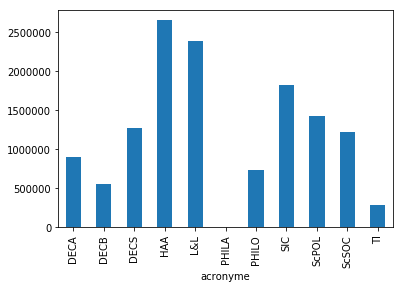

In [22]:
mission.groupby("acronyme")["distance"].sum().plot(kind='bar')

#### Top 15 Mission destination counrty

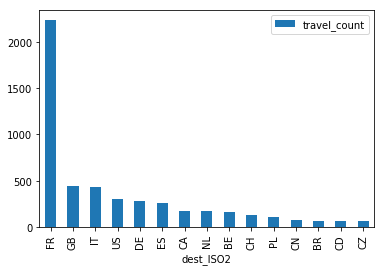

In [23]:
s = travel.groupby('dest_ISO2')['travel_id'].count().to_frame()
s = s.rename(columns={'travel_id': 'travel_count'}).sort_values('travel_count', ascending=False)
s.iloc[:15,:].plot(kind='bar')

#### Top 15 Mission cumulated distance

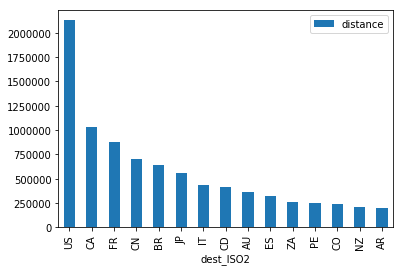

In [24]:
d = travel.groupby('dest_ISO2')['distance'].sum().to_frame()
d = d.sort_values('distance', ascending=False)
d.iloc[:15,:].plot(kind='bar')

#### Cumulated distance of Top 15 most visited destination

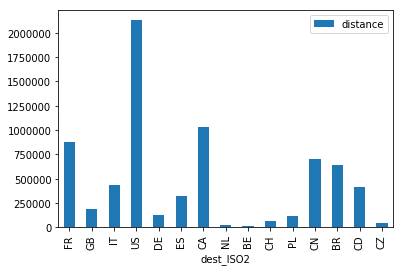

In [25]:
d.loc[s.iloc[:15].index,:].plot(kind='bar')

### Basic Maps

#### Mission origins

In [26]:
pfrom = gpd.GeoDataFrame(travel, geometry=gpd.points_from_xy(travel.from_lng, travel.from_lat))
pfrom.crs = {'init': 'epsg:4326'}

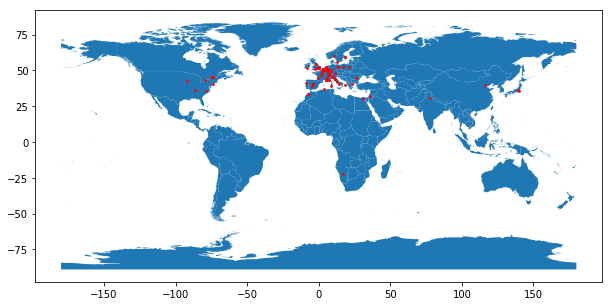

In [27]:
fig, axe = plt.subplots(figsize=(15,5))
country.plot(ax=axe)
pfrom.plot(ax=axe, color='r', markersize=3)

#### Mission destinations

In [28]:
pdest = gpd.GeoDataFrame(travel, geometry=gpd.points_from_xy(travel.dest_lng, travel.dest_lat))
pdest.crs = {'init': 'epsg:4326'}

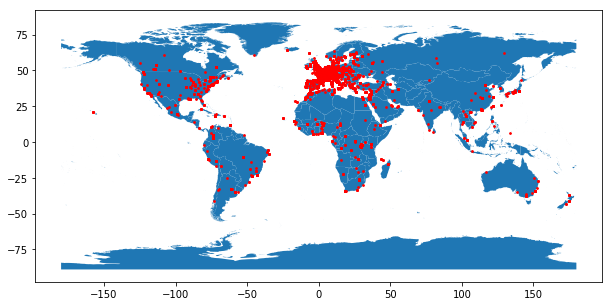

In [29]:
fig, axe = plt.subplots(figsize=(15,5))
country.plot(ax=axe)
pdest.plot(ax=axe, color='r', markersize=3)

(1000000.0, 5000000.0)

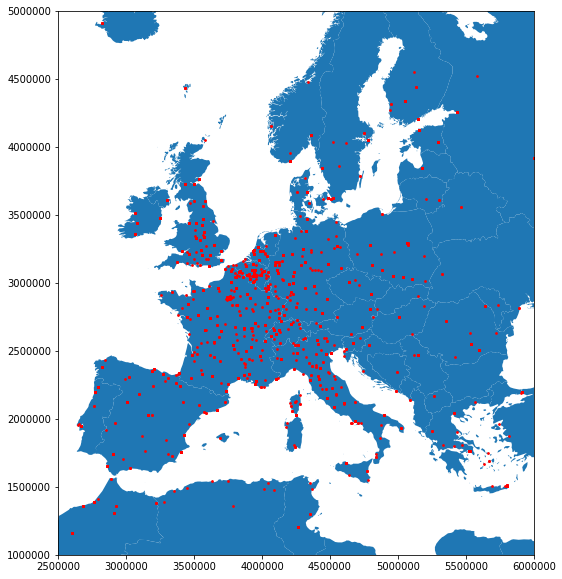

In [30]:
fig, axe = plt.subplots(figsize=(10,10))
country.to_crs("EPSG:3035").plot(ax=axe)
pdest.to_crs("EPSG:3035").plot(ax=axe, color='r', markersize=3)
axe.set_xlim(2.5e6, 6e6)
axe.set_ylim(1.0e6, 5e6)